Prediction Question:
How is the severeness of heart disease determined through analyzing the patients' age, resting blood pressure, and max heart rate.

This data that we used to answer our predictive question describes a patient's data such as age, sex, blood pressure, heart rate and more related aspects as well as their heart conditions and whether if they have a severe heart disease. 

In general, this report will analyze the connection between a patient's age, blood pressure, max heart rate and how that affects the severeness of the patients' heart disease. This report will also record the accuracy of using 3 distinct predictors at the end.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 10)

full_set <- read_csv("https://raw.githubusercontent.com/CharlesMa153/dsci100_project_csv/main/processed.cleveland.data")
colnames(full_set) <- c("age", "sex", "chest_pain", "trest_bps", "cholesterol", "fast_blood_sugar", "resting_ecg", 
                             "max_hr", "exer_agina", "st_depr", "exercise_segment_slope", 
                             "num_major_vessels", "heart_condition", "disease_diagnosis")
full_set

used_data <- full_set |> select(age, trest_bps, max_hr, disease_diagnosis) |>
                        mutate(disease_diagnosis = as.factor(disease_diagnosis))
used_data

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

age,sex,chest_pain,trest_bps,cholesterol,fast_blood_sugar,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


age,trest_bps,max_hr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
67,160,108,2
67,120,129,1
37,130,187,0
41,130,172,0
56,120,178,0
⋮,⋮,⋮,⋮
45,110,132,1
68,144,141,2
57,130,115,3


From the code above, related libraries are imported and the data is provided through downloading it into a personal github, then uploading from there. 

Since there are no names for each column, that's the first thing we will do, these data are given from the source we used (Heart disease given on canvas). 

Secondly, we will select the columns we will be using (predictors and response variable), in this case, disease_diagnosis is used as our response variable which has a scale of 0-4 that's given by a doctor's perspective on the patient's heart disease level (0 is health and 4 is extremely bad). We used age, resting blood pressure, as well as max heart rate as predictors.

We chose the 3 predictors stated since they were the most significant in terms of determining whether if a patient has severe heart disease out of all the columns listed. For example, usually patients who are older, with higher blood pressure or have higher max heart rate means it is more likely for them to have heart disease. On the other hand, cholesterol wouldn't be a smart pick as it doesn't really have a strong relationship with whether if a patient has heart disease or not.

The last thing we did was to make our response variable a factor.

In [12]:
set.seed(4321)
disease_split <- initial_split(used_data, prop = 0.75, strata = disease_diagnosis)  
disease_train <- training(disease_split)   
disease_test <- testing(disease_split)
disease_train
disease_test

age,trest_bps,max_hr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
37,130,187,0
41,130,172,0
56,120,178,0
57,120,163,0
57,140,148,0
⋮,⋮,⋮,⋮
52,125,168,3
58,136,152,3
61,138,125,4


age,trest_bps,max_hr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
67,120,129,1
62,140,160,3
44,120,173,0
57,150,174,0
48,110,168,1
⋮,⋮,⋮,⋮
55,128,130,3
58,170,146,2
44,120,144,2


We split the data into two portions, training and testing, with training portion having 75% of the data and the test having 25% of the data. We also set a seed value here since we don't want the randomization to be different every time we run the test. (The set seed value will appear in every cell from here even though it is not neccessary in every cell, we only need it in cells that have randomization involved, however, to reduce unneccessary confusion, we will include it everywhere)

In [13]:
set.seed(4321)
disease_recipe <- recipe(disease_diagnosis ~ ., data = disease_train) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

As mentioned, the disease_diagnosis will be our response variable and every other column will be part of our predictors. We use the training data. We also have to scale the data since at the moment, their values are all over the place, we must make them on the same scale from 0-1 so we can make a more accurate and reliable prediction.

In [14]:
set.seed(4321)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

First, we have to find out a k-value that is best to use in order to make our prediction most accurate, so we set our neighbors to tune() and begin our classification by finding the k-value.

In [15]:
set.seed(4321)
disease_vfold <- vfold_cv(disease_train, v = 5, strata = disease_diagnosis)

We next perform the cross validation with v-fold, and we set it to 5-folds.

In [16]:
set.seed(4321)
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() |>
       add_recipe(disease_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = disease_vfold, grid = gridvals) |>
       collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3954630,5,0.021504177,Preprocessor1_Model01
1,roc_auc,hand_till,0.4955726,5,0.011091790,Preprocessor1_Model01
2,accuracy,multiclass,0.3954630,5,0.021504177,Preprocessor1_Model02
2,roc_auc,hand_till,0.4981627,5,0.008314284,Preprocessor1_Model02
3,accuracy,multiclass,0.4264107,5,0.016835780,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,roc_auc,hand_till,0.5828423,5,0.01937135,Preprocessor1_Model48
49,accuracy,multiclass,0.5558952,5,0.01153232,Preprocessor1_Model49
49,roc_auc,hand_till,0.5913834,5,0.02251871,Preprocessor1_Model49


Next, we will check the accuracy for 50 k-values to predict which k-value has the highest accuracy amoung all of them, which will decide the k-value we will be using for our actual analysis. (The 50 k-values was originally set as 100, but since we found out it was less than 50, and it takes too long to load 100 k-values, so we changed the total k-values to 50 instead)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


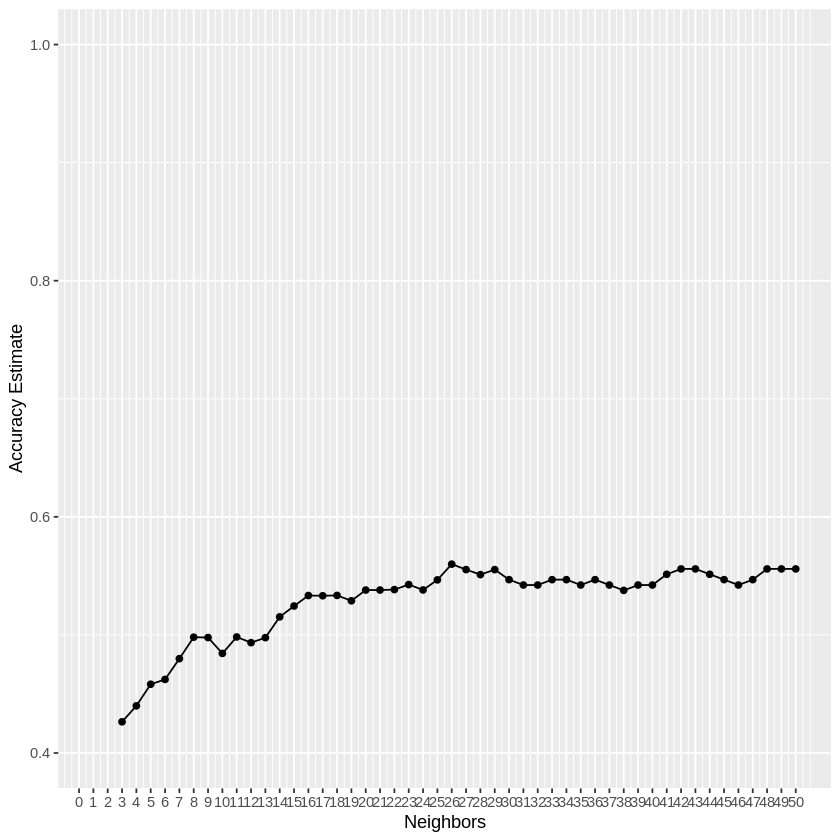

In [17]:
set.seed(4321)
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 50, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

From this plot, we can tell the accuracy is somewhat different amoung all different k-values, the accurcies are spread between low 40's to the mid 50's, which is great! 

However, we can tell that the accuracy is pretty low as the prediction is only right half the time, this may be due to the fact that our response variable consists of 5 possibilities, which reduces the accuracy (if we were to randomly pick, we only have a 20% chance of picking the right choice). We will discuss more about this after getting the actual accuracy!

Now what we will do is to select the k-value with the highest accuracy.

In [18]:
set.seed(4321)
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 26

From this code, we sorted all the accuracies from the k-values (up to 50) and chose the one with the greatest accuracy, which is when k = 26, this is what we will be using to find out our best accuracy.

In [19]:
set.seed(4321)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
       set_engine("kknn") |>
       set_mode("classification")

disease_fit <- workflow() |>
       add_recipe(disease_recipe) |>
       add_model(knn_spec) |>
       fit(data = disease_train)
disease_fit

disease_test_predictions <- predict(disease_fit , disease_test) |>
       bind_cols(disease_test)
disease_test_predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4444444
Best kernel: rectangular
Best k: 26

.pred_class,age,trest_bps,max_hr,disease_diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<fct>
0,67,120,129,1
0,62,140,160,3
0,44,120,173,0
0,57,150,174,0
0,48,110,168,1
⋮,⋮,⋮,⋮,⋮
3,55,128,130,3
0,58,170,146,2
0,44,120,144,2


From the code above, we've created a new nearest neighbor function as we have figured what k-value to use for our neighbors, we don't need to change the recipe since we are still using the same response variable and predictors. We now use the new knn_spec and recipe to create disease_fit, which is used for our testing portion of the data where it can predict the value of our response variable based on the 3 predictors that we have, this new prediction is called .pred_class in the graph above.

In [20]:
set.seed(4321)
disease_prediction_accuracy <- disease_test_predictions |>
         metrics(truth = disease_diagnosis, estimate = .pred_class)  
disease_prediction_accuracy

disease_mat <- disease_test_predictions |> 
       conf_mat(truth = disease_diagnosis, estimate = .pred_class)
disease_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5324675
kap,multiclass,0.1291235


          Truth
Prediction  0  1  2  3  4
         0 38 12  8  6  4
         1  1  0  1  0  1
         2  0  0  0  0  1
         3  0  1  1  3  0
         4  0  0  0  0  0

Finally, we can now find the accuracy of the prediction, which is around 53.2%. This prediction sounds low but is actually not extremely bad since recall that our response variable could be 5 values (0, 1, 2, 3, 4) which does indeed effect overall accuracy. 

From the confusion matrix, we can see that many patients without disease is predicted right (38), however, there are lots of cases where it predicted patients to have no heart disease, where in reality, they do (12 + 8 + 6 + 4 = 30 total). This is actually very bad in real life and is considered false negative, which could cost lives as patients may not get treatment on time as the patients are told to have no disease where in reality they needed treatments. The reason why this happened is not because of the code, but rather the dataset we used for this prediction. We see that the dataset has barely any high level disease, most of the data are all level 0 disease, which resulted in the prediction to be mostly level 0, causing a very high inaccuracy. On the other hand, because of this issue, it almost didn't make any mistake in terms of the false positive side (patients who don't have a heart disease are detected to have heart disease) which is somewhat good as patients don't need to waste money for cure when they are healthy afterall.

Since the accuracy that we got was somewhat expected but is indeed quite low, and knowing the fact that we didn't use all the columns as predictors, we decided to have a quick switch for our predictors and see the outcomes. It turns out that no matter which predictor/predictors we use, the accuracy will always remain extremely low, however, in our case, we are unable to change the accuracy based on changing the predictors. Here is a list of attempts we've tried for predictors and the results:


age, trest_bps, max_hr -> 53.2%

age, cholesterol, trest_bps -> 51%

age, st_depr, max_hr -> 54.5%

age, st_depr, trest_bps -> 51%

age, st_depr, max_hr, trest_bps -> 51.9%

From here, we see that the highest accuracy we got was from age, ST depression, and max heart rate, but it wasn't a lot higher than the predictors that we used which was 53.2%, we can see that no matter which predictors we used, the accuracy is always in the low 50's.

The reason why we only chose some of these columns as predictors is because the other columns are simply "bad" predictors without even the need to test them. For example, in the sex column, the output is either 0 or 1, which means it only has 2 possibilities, these choices should be automatically eliminated when choosing predictors as they are not broad enough to predict anything.

As previously mentioned, if we were to use this application in real life, it would simply be a disaster as it could kill millions of patients due to not having treatment/surgery on time. Despite knowing the terrible accuracy, it is also important to understand why this is happening and how we can fix this. We know that this is happening since we've mentioned that the response variable has 5 possiblities, which reduces accuracies due to a large variance, the other reason is that the dataset itself isn't quite good, as it mainly contains data with level 0 disease and barely any high level disease, causing the prediction to also mainly predict level 0. 

To better approach this in the future, more resources should be invested in this dataset, and more higher level disease should be recorded so that the dataset contains fairly equal amount of data from each level of diseases. Once we have achieved a good accuracy of predicting the heart disease, we could possibly apply this application in real life, not only providing details of which factor affects heart disease more, but also making it easier for professionals to determine the severity of the disease based on these factors.

**References:**

Centers for Disease Control and Prevention. (2023, May 15). Heart Disease Facts. Heart Disease. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Coronary%20heart%20disease%20is%20the,killing%20375%2C476%20people%20in%202021.&text=About%201%20in%2020%20adults,have%20CAD%20(about%205%25).&text=In%202021%2C%20about%202%20in,less%20than%2065%20years%20old.

Government of Canada. (2022, July 28). Heart Disease in Canada. Public Health Agency of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, and Detrano, Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Mayo Foundation for Medical Education and Research. (2022, August 25). Heart disease. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118